<a href="https://colab.research.google.com/github/Gdearmascasta/Analisis-de-temperatura.io/blob/main/Imputacion_con_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes:
- German Eduardo De Armas Castaño T000
- Gabriela Becerra T000
- Valentina Zuñiga T000

**¿ Que es UC Irvine Machine Learning Repository ?** Es una colección de conjuntos de datos mantenida por la Universidad de California en Irvine (UC Irvine), diseñada para facilitar la investigación, enseñanza y pruebas de algoritmos de machine learning.


**¿ Cual dataset se va a utilizar?** **¿De que trata?** Este dataset contiene información sobre el rendimiento relativo de CPUs en función de diversas características de hardware. Fue donado en 1987 por Jacob Feldmesser y Phillip Ein-Dor de la Universidad de Tel Aviv.​
 https://archive.ics.uci.edu/dataset/29/computer+hardware

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Importar el dataset
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
computer_hardware = fetch_ucirepo(id=29)

# data (as pandas dataframes)
X = computer_hardware.data.features
Y = computer_hardware.data.targets

# metadata
print(computer_hardware.metadata)

# variable information
print(computer_hardware.variables)

{'uci_id': 29, 'name': 'Computer Hardware', 'repository_url': 'https://archive.ics.uci.edu/dataset/29/computer+hardware', 'data_url': 'https://archive.ics.uci.edu/static/public/29/data.csv', 'abstract': 'Relative CPU Performance Data, described in terms of its cycle time, memory size, etc.', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 209, 'num_features': 10, 'feature_types': ['Integer'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Fri Oct 27 2023', 'dataset_doi': '10.24432/C5830D', 'creators': ['Jacob Feldmesser'], 'intro_paper': None, 'additional_info': {'summary': 'The estimated relative performance values were estimated by the authors using a linear regression method.  See their article (pp 308-313) for more details on how the relative performance values were set.', 'purpose': None, 'funded_by': N

In [ ]:
X.dtypes

,0
VendorName,object
ModelName,object
MYCT,int64
MMIN,int64
MMAX,int64
CACH,int64
CHMIN,int64
CHMAX,int64
PRP,int64
ERP,int64


In [ ]:
X

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [ ]:
X.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [ ]:
data1=X.select_dtypes(include='int64')


In [ ]:
data1

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...
204,124,1000,8000,0,1,8,42,37
205,98,1000,8000,32,2,8,46,50
206,125,2000,8000,0,2,14,52,41
207,480,512,8000,32,0,0,67,47


In [ ]:
# Ver porcentaje de Nan
data1.isnull().sum()/len(data1)*100

,0
MYCT,0.0
MMIN,0.0
MMAX,0.0
CACH,0.0
CHMIN,0.0
CHMAX,0.0
PRP,0.0
ERP,0.0


**Este dataset no posee valores Nan**

**Generacion de datos Nan**

In [ ]:
def add_random_missing_values(df, missing_percentage, random_state=None):

    np.random.seed(random_state)

    df_missing = df.copy()
    total_cells = df.size
    n_missing = int(np.floor(total_cells * missing_percentage))

    # Generate random indices
    idx = [(row, col) for row in range(df.shape[0]) for col in range(df.shape[1])]
    missing_indices = np.random.choice(range(total_cells), size=n_missing, replace=False)

    for index in missing_indices:
        row, col = idx[index]
        df_missing.iat[row, col] = np.nan

    return df_missing

In [ ]:
data_with_nans = add_random_missing_values(data1, missing_percentage=0.35, random_state=44)

In [ ]:
data_with_nans

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125.0,256.0,NaN,NaN,16.0,128.0,198.0,NaN
1,NaN,NaN,32000.0,32.0,8.0,NaN,NaN,NaN
2,29.0,8000.0,32000.0,NaN,NaN,32.0,220.0,NaN
3,29.0,8000.0,32000.0,32.0,8.0,NaN,172.0,253.0
4,NaN,8000.0,16000.0,32.0,8.0,16.0,NaN,132.0
...,...,...,...,...,...,...,...,...
204,124.0,1000.0,NaN,0.0,1.0,8.0,NaN,37.0
205,NaN,NaN,8000.0,32.0,2.0,NaN,NaN,50.0
206,NaN,2000.0,NaN,NaN,2.0,14.0,NaN,NaN
207,480.0,512.0,8000.0,32.0,0.0,0.0,67.0,47.0


% de NaN por columna


In [ ]:
data2=data_with_nans.copy()

In [ ]:
print("Hay {} datos".format(len(data_with_nans)))
for i in data_with_nans.columns:
    print("Hay {} ({}%) datos faltantes en la columna {}".format(len(data_with_nans[data_with_nans[i].isna()]), np.round(len(data_with_nans[data_with_nans[i].isna()])/len(data_with_nans)*100,2), i))

Hay 209 datos
Hay 87 (41.63%) datos faltantes en la columna MYCT
Hay 73 (34.93%) datos faltantes en la columna MMIN
Hay 74 (35.41%) datos faltantes en la columna MMAX
Hay 74 (35.41%) datos faltantes en la columna CACH
Hay 68 (32.54%) datos faltantes en la columna CHMIN
Hay 65 (31.1%) datos faltantes en la columna CHMAX
Hay 79 (37.8%) datos faltantes en la columna PRP
Hay 65 (31.1%) datos faltantes en la columna ERP


**Imputacion simple (media y mediana)**

In [ ]:
def simple_impute(df, strategy='mean'):
    """
    Imputes missing values in a DataFrame using mean or median.

    Parameters:
        df (pd.DataFrame): DataFrame with missing values.
        strategy (str): Imputation strategy ('mean' or 'median').

    Returns:
        pd.DataFrame: Imputed DataFrame.
    """
    imputed_df = df.copy()

    for column in imputed_df.columns:
        if strategy == 'mean':
            value = imputed_df[column].mean()
        elif strategy == 'median':
            value = imputed_df[column].median()
        else:
            raise ValueError("Strategy must be either 'mean' or 'median'")

        imputed_df[column] = imputed_df[column].fillna(value)

    return imputed_df


In [ ]:
data_imputed_mean = simple_impute(data2, strategy='mean')

In [ ]:
data_imputed_mean

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125.000000,256.000000,12102.548148,24.622222,16.000000,128.000000,198.0,93.576389
1,224.336066,2874.941176,32000.000000,32.000000,8.000000,19.208333,104.6,93.576389
2,29.000000,8000.000000,32000.000000,24.622222,3.879433,32.000000,220.0,93.576389
3,29.000000,8000.000000,32000.000000,32.000000,8.000000,19.208333,172.0,253.000000
4,224.336066,8000.000000,16000.000000,32.000000,8.000000,16.000000,104.6,132.000000
...,...,...,...,...,...,...,...,...
204,124.000000,1000.000000,12102.548148,0.000000,1.000000,8.000000,104.6,37.000000
205,224.336066,2874.941176,8000.000000,32.000000,2.000000,19.208333,104.6,50.000000
206,224.336066,2000.000000,12102.548148,24.622222,2.000000,14.000000,104.6,93.576389
207,480.000000,512.000000,8000.000000,32.000000,0.000000,0.000000,67.0,47.000000


**Comparación del dataset original con respecto al dataset con valores faltantes e imputados**

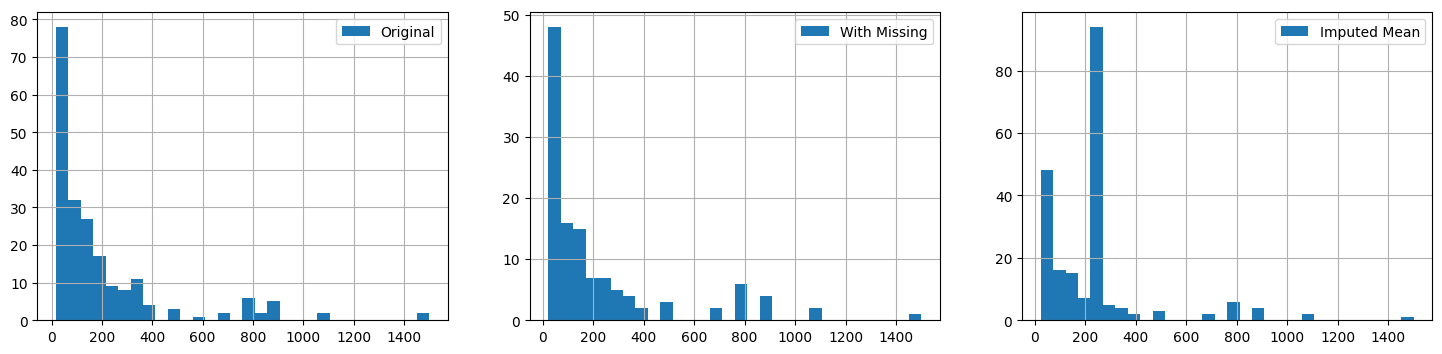

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(131)
data1["MYCT"].hist(bins=30,label="Original")
plt.legend()
plt.subplot(132)
data2["MYCT"].hist(bins=30,label="With Missing")
plt.legend()
plt.subplot(133)
data_imputed_mean["MYCT"].hist(bins=30,label="Imputed Mean")
plt.legend()
plt.show()

**Evaluación de los errores**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_imputation(original_df, imputed_df, df_with_nans):

    results = {'Feature': [], 'MSE': [], 'MAE': []}

    for column in original_df.columns:
        # Only evaluate where data was originally missing
        missing_mask = df_with_nans[column].isna()

        if missing_mask.sum() > 0:
            original_values = original_df.loc[missing_mask, column]
            imputed_values = imputed_df.loc[missing_mask, column]

            mse = mean_squared_error(original_values, imputed_values)
            mae = mean_absolute_error(original_values, imputed_values)

            results['Feature'].append(column)
            results['MSE'].append(mse)
            results['MAE'].append(mae)

    return pd.DataFrame(results)


In [ ]:
evaluation_results_mean = evaluate_imputation(data1, data_imputed_mean, data2)
evaluation_results_mean

,Feature,MSE,MAE
0,MYCT,5.138820e+04,159.913416
1,MMIN,1.160825e+07,2289.548751
2,MMAX,1.320141e+08,8962.153353
3,CACH,1.789967e+03,26.965165
4,CHMIN,1.047543e+02,5.500521
5,CHMAX,5.745242e+02,15.042949
6,PRP,2.914248e+04,102.865823
7,ERP,3.107216e+04,89.949466


**Imputacion Iterativa**

In [ ]:
def iterative_imputer(df, max_iter=100, initial_strategy='mean'):
    """
    Performs Iterative Imputation using simple linear regression without sklearn.

    Parameters:
        df (pd.DataFrame): DataFrame containing missing values.
        max_iter (int): Number of iterations.
        initial_strategy (str): Strategy for initial imputation ('mean' or 'median').

    Returns:
        pd.DataFrame: Imputed DataFrame.
    """
    imputed_df = df.copy()

    # Initial imputation
    for col in imputed_df.columns:
        if initial_strategy == 'mean':
            imputed_df[col] = imputed_df[col].fillna(imputed_df[col].mean())
        elif initial_strategy == 'median':
            imputed_df[col] = imputed_df[col].fillna(imputed_df[col].median())
        else:
            raise ValueError("initial_strategy must be 'mean' or 'median'")

    for iteration in range(max_iter):
        for col in imputed_df.columns:
            # Identify rows with missing values for the current column
            missing_mask = df[col].isna()
            if missing_mask.sum() == 0:
                continue

            # Use other columns as predictors
            X_train = imputed_df.loc[~missing_mask].drop(col, axis=1)
            y_train = imputed_df.loc[~missing_mask, col]
            X_missing = imputed_df.loc[missing_mask].drop(col, axis=1)

            # Add intercept
            X_train_aug = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
            X_missing_aug = np.hstack((np.ones((X_missing.shape[0], 1)), X_missing))

            # Solve linear regression (ordinary least squares)
            coef, _, _, _ = np.linalg.lstsq(X_train_aug, y_train, rcond=None)

            # Predict and update missing values
            imputed_values = X_missing_aug @ coef
            imputed_df.loc[missing_mask, col] = imputed_values

    return imputed_df

In [ ]:
data_iterative_imputed = iterative_imputer(data2, max_iter=30, initial_strategy='mean')

In [ ]:
data_iterative_imputed

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125.000000,256.000000,14482.365052,61.344048,16.000000,128.000000,198.000000,197.228838
1,74.394753,9123.496246,32000.000000,32.000000,8.000000,24.840258,218.358381,279.163101
2,29.000000,8000.000000,32000.000000,45.773661,7.198269,32.000000,220.000000,273.381035
3,29.000000,8000.000000,32000.000000,32.000000,8.000000,33.760654,172.000000,253.000000
4,9.833932,8000.000000,16000.000000,32.000000,8.000000,16.000000,103.801105,132.000000
...,...,...,...,...,...,...,...,...
204,124.000000,1000.000000,7105.400188,0.000000,1.000000,8.000000,26.773492,37.000000
205,252.023899,1511.272369,8000.000000,32.000000,2.000000,12.994217,58.873959,50.000000
206,247.138110,2000.000000,10157.664336,23.756357,2.000000,14.000000,81.919274,81.663920
207,480.000000,512.000000,8000.000000,32.000000,0.000000,0.000000,67.000000,47.000000


In [ ]:
evaluation_results_iterative = evaluate_imputation(data1, data_iterative_imputed,data2)
evaluation_results_iterative

,Feature,MSE,MAE
0,MYCT,9.760262e+04,205.715907
1,MMIN,6.830498e+06,1735.576869
2,MMAX,4.723188e+07,4669.090871
3,CACH,1.761892e+03,22.482221
4,CHMIN,7.231467e+01,4.000515
5,CHMAX,3.648761e+02,11.560552
6,PRP,7.886475e+03,38.812365
7,ERP,8.049154e+03,38.642461


In [ ]:
def plot_imputation_errors_barh(eval_simple, eval_iterative, metric='MSE'):

    features = eval_simple['Feature']
    y = np.arange(len(features))
    height = 0.35

    fig, ax = plt.subplots(figsize=(10, 3))

    bars1 = ax.barh(y - height/2, eval_simple[metric], height, label='Simple Imputation', alpha=0.7)
    bars2 = ax.barh(y + height/2, eval_iterative[metric], height, label='Iterative Imputation', alpha=0.7)

    ax.set_ylabel('Features')
    ax.set_xlabel(metric)
    ax.set_title(f'Comparación de {metric} entre metodos de imputación')
    ax.set_yticks(y)
    ax.set_yticklabels(features)
    ax.legend()

    plt.tight_layout()
    plt.show()

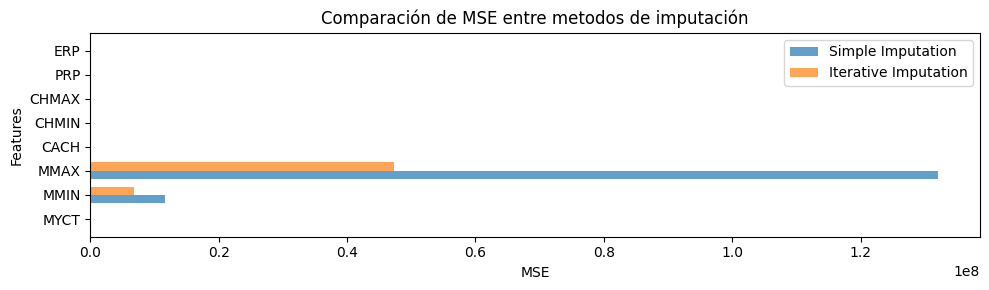

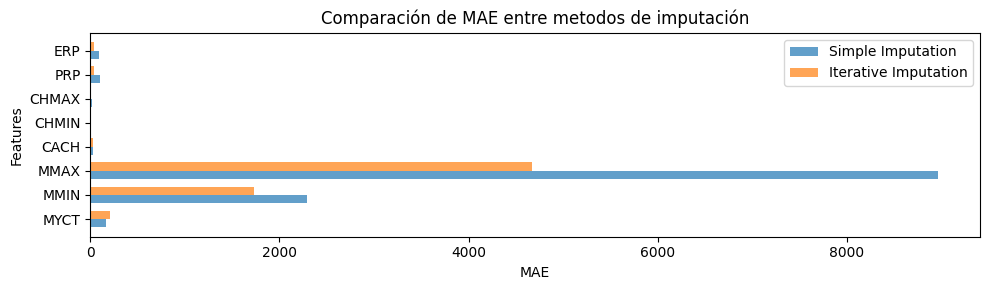

In [ ]:
plot_imputation_errors_barh(evaluation_results_mean, evaluation_results_iterative, metric='MSE')
plot_imputation_errors_barh(evaluation_results_mean, evaluation_results_iterative, metric='MAE')

**Estrategia de Machine Learning**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge, GammaRegressor, HuberRegressor, PoissonRegressor, Ridge, TheilSenRegressor, TweedieRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
imp_RF = IterativeImputer(estimator=RandomForestRegressor(),verbose=1,add_indicator=False)
imp_RF.fit(data_with_nans)
data_imputed_RF=pd.DataFrame(imp_RF.transform(data_with_nans),columns=data1.columns)

[IterativeImputer] Completing matrix with shape (209, 8)
[IterativeImputer] Change: 39660.58186367218, scaled tolerance: 64.0 
[IterativeImputer] Change: 13268.12, scaled tolerance: 64.0 
[IterativeImputer] Change: 8340.8, scaled tolerance: 64.0 
[IterativeImputer] Change: 4942.48, scaled tolerance: 64.0 
[IterativeImputer] Change: 5439.259999999998, scaled tolerance: 64.0 
[IterativeImputer] Change: 2383.459999999999, scaled tolerance: 64.0 
[IterativeImputer] Change: 2717.63, scaled tolerance: 64.0 
[IterativeImputer] Change: 3706.9599999999987, scaled tolerance: 64.0 
[IterativeImputer] Change: 2898.51, scaled tolerance: 64.0 
[IterativeImputer] Change: 3828.33, scaled tolerance: 64.0 
[IterativeImputer] Completing matrix with shape (209, 8)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
evaluation_results_ML = evaluate_imputation(data1, data_imputed_RF, data2)
evaluation_results_ML

,Feature,MSE,MAE
0,MYCT,3.532396e+04,106.660920
1,MMIN,2.198165e+06,951.465753
2,MMAX,4.029971e+07,2935.418378
3,CACH,5.986169e+02,13.572297
4,CHMIN,5.687229e+01,3.551176
5,CHMAX,4.398072e+02,14.030000
6,PRP,3.624567e+03,32.117975
7,ERP,5.328815e+03,26.559692


In [ ]:
def plot_imputation_errors_barh2(eval_simple, eval_iterative, label1, label2, metric='MSE'):

    features = eval_simple['Feature']
    y = np.arange(len(features))
    height = 0.35

    fig, ax = plt.subplots(figsize=(10, 3))

    bars1 = ax.barh(y - height/2, eval_simple[metric], height, label=label1, alpha=0.7)
    bars2 = ax.barh(y + height/2, eval_iterative[metric], height, label=label2, alpha=0.7)

    ax.set_ylabel('Features')
    ax.set_xlabel(metric)
    ax.set_title(f'Comparación de {metric} entre metodos de imputación')
    ax.set_yticks(y)
    ax.set_yticklabels(features)
    ax.legend()

    plt.tight_layout()
    plt.show()

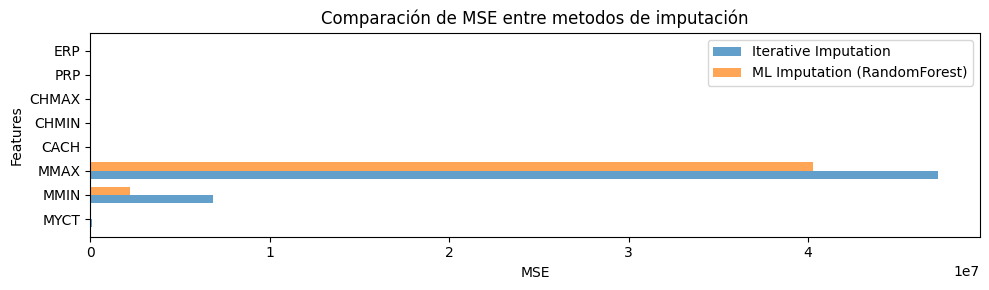

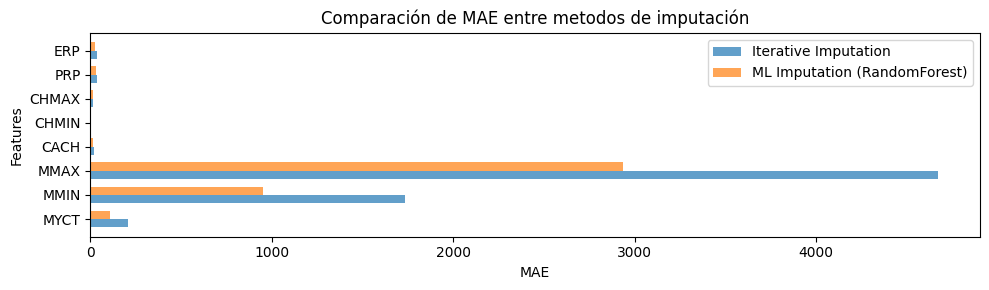

In [ ]:
plot_imputation_errors_barh2(evaluation_results_iterative, evaluation_results_ML, "Iterative Imputation", "ML Imputation (RandomForest)", metric='MSE')
plot_imputation_errors_barh2(evaluation_results_iterative, evaluation_results_ML, "Iterative Imputation", "ML Imputation (RandomForest)", metric='MAE')

**Comparaciones entre los tres metodos**


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

def compare_imputations(original, with_nans, mean_imputed, iterative_imputed, ml_imputed):
    results = {}

    for col in with_nans.columns:
        mask = with_nans[col].isna()
        if mask.sum() > 0:
            results[col] = {
                'MAE_Mean': mean_absolute_error(original[col][mask], mean_imputed[col][mask]),
                'MSE_Mean': mean_squared_error(original[col][mask], mean_imputed[col][mask]),
                'MAE_Iterative': mean_absolute_error(original[col][mask], iterative_imputed[col][mask]),
                'MSE_Iterative': mean_squared_error(original[col][mask], iterative_imputed[col][mask]),
                'MAE_ML': mean_absolute_error(original[col][mask], ml_imputed[col][mask]),
                'MSE_ML': mean_squared_error(original[col][mask], ml_imputed[col][mask]),
            }

    return pd.DataFrame(results).T


In [ ]:

def plot_imputation_comparison(results_df, metric='MAE'):
    methods = [f'{metric}_Mean', f'{metric}_Iterative', f'{metric}_ML']
    results_df[methods].plot(kind='bar', figsize=(12,6))
    plt.title(f'Comparación de {metric} entre métodos de imputación')
    plt.ylabel(metric)
    plt.xlabel('Variables')
    plt.xticks(rotation=45)
    plt.legend(title='Método')
    plt.tight_layout()
    plt.show()


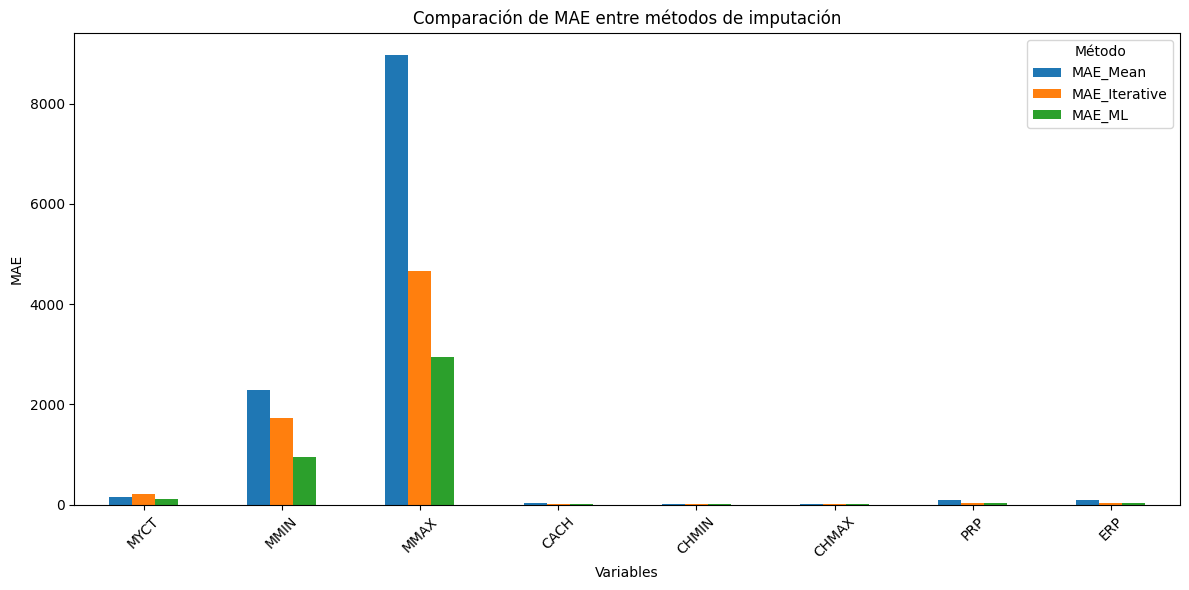

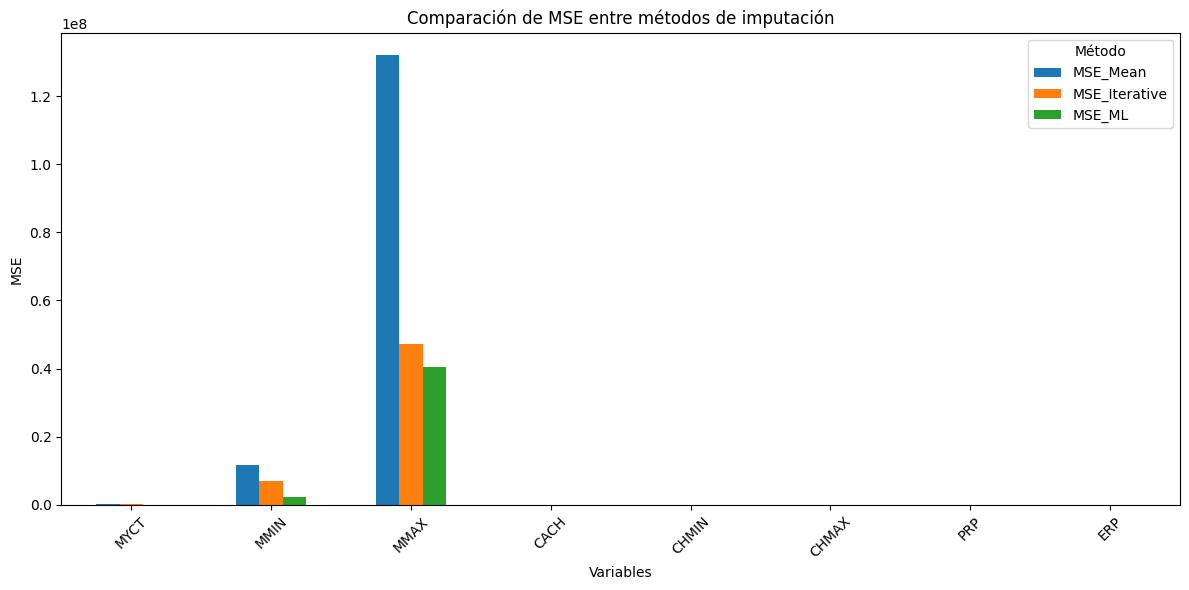

In [ ]:
comparison_results = compare_imputations(data1,data2,data_imputed_mean,data_iterative_imputed,data_imputed_RF)

# 2. Ver resultados en tabla
comparison_results

# 3. Graficar MAE
plot_imputation_comparison(comparison_results, metric='MAE')

# 4. Graficar MSE
plot_imputation_comparison(comparison_results, metric='MSE')

**Variación de hiperparametros**

In [ ]:
imp_RF2 = IterativeImputer(estimator=RandomForestRegressor(n_estimators=150),verbose=1,add_indicator=False)
imp_RF2.fit(data2)
data_imputed_RF2=pd.DataFrame(imp_RF2.transform(data_with_nans),columns=data1.columns)

[IterativeImputer] Completing matrix with shape (209, 8)
[IterativeImputer] Change: 43314.89519700552, scaled tolerance: 64.0 
[IterativeImputer] Change: 8514.226666666667, scaled tolerance: 64.0 
[IterativeImputer] Change: 5937.3933333333325, scaled tolerance: 64.0 
[IterativeImputer] Change: 14640.18, scaled tolerance: 64.0 
[IterativeImputer] Change: 6178.5933333333305, scaled tolerance: 64.0 
[IterativeImputer] Change: 2542.5866666666716, scaled tolerance: 64.0 
[IterativeImputer] Change: 2593.0266666666666, scaled tolerance: 64.0 
[IterativeImputer] Change: 1740.7133333333356, scaled tolerance: 64.0 
[IterativeImputer] Change: 1408.0266666666673, scaled tolerance: 64.0 
[IterativeImputer] Change: 1859.0066666666694, scaled tolerance: 64.0 
[IterativeImputer] Completing matrix with shape (209, 8)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
evaluation_results_ML = evaluate_imputation(data1, data_imputed_RF2, data2)
evaluation_results_ML

,Feature,MSE,MAE
0,MYCT,4.081905e+04,111.373333
1,MMIN,2.391840e+06,978.355616
2,MMAX,3.988708e+07,2902.437838
3,CACH,5.911347e+02,13.395225
4,CHMIN,5.847989e+01,3.523039
5,CHMAX,3.451603e+02,12.564718
6,PRP,3.896334e+03,32.394852
7,ERP,6.226933e+03,27.049538


In [ ]:
imp_RF3 = IterativeImputer(estimator=RandomForestRegressor(n_estimators=300),verbose=1,add_indicator=False)
imp_RF3.fit(data2)
data_imputed_RF3=pd.DataFrame(imp_RF3.transform(data_with_nans),columns=data1.columns)

[IterativeImputer] Completing matrix with shape (209, 8)
[IterativeImputer] Change: 40591.59853033885, scaled tolerance: 64.0 
[IterativeImputer] Change: 11408.146666666666, scaled tolerance: 64.0 
[IterativeImputer] Change: 7863.106666666666, scaled tolerance: 64.0 
[IterativeImputer] Change: 11074.656666666668, scaled tolerance: 64.0 
[IterativeImputer] Change: 4256.139999999999, scaled tolerance: 64.0 
[IterativeImputer] Change: 2340.2800000000016, scaled tolerance: 64.0 
[IterativeImputer] Change: 3446.5099999999998, scaled tolerance: 64.0 
[IterativeImputer] Change: 14063.376666666667, scaled tolerance: 64.0 
[IterativeImputer] Change: 3875.2733333333335, scaled tolerance: 64.0 
[IterativeImputer] Change: 2472.4166666666665, scaled tolerance: 64.0 
[IterativeImputer] Completing matrix with shape (209, 8)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
evaluation_results_ML = evaluate_imputation(data1, data_imputed_RF3, data2)
evaluation_results_ML

,Feature,MSE,MAE
0,MYCT,3.834594e+04,109.407816
1,MMIN,3.262986e+06,1040.785297
2,MMAX,3.744585e+07,2850.035856
3,CACH,6.209594e+02,14.406261
4,CHMIN,5.459900e+01,3.440049
5,CHMAX,3.030666e+02,12.069538
6,PRP,3.737259e+03,32.286414
7,ERP,5.871423e+03,26.942667


In [ ]:
imp_RF4 = IterativeImputer(estimator=RandomForestRegressor(n_estimators=400),verbose=1,add_indicator=False)
imp_RF4.fit(data2)
data_imputed_RF4=pd.DataFrame(imp_RF4.transform(data_with_nans),columns=data1.columns)

[IterativeImputer] Completing matrix with shape (209, 8)
[IterativeImputer] Change: 40774.47436367218, scaled tolerance: 64.0 
[IterativeImputer] Change: 10697.127499999999, scaled tolerance: 64.0 
[IterativeImputer] Change: 2705.4549999999995, scaled tolerance: 64.0 
[IterativeImputer] Change: 7761.4275, scaled tolerance: 64.0 
[IterativeImputer] Change: 9494.105, scaled tolerance: 64.0 
[IterativeImputer] Change: 6286.195, scaled tolerance: 64.0 
[IterativeImputer] Change: 3537.510000000002, scaled tolerance: 64.0 
[IterativeImputer] Change: 1154.9299999999998, scaled tolerance: 64.0 
[IterativeImputer] Change: 1217.9775000000004, scaled tolerance: 64.0 
[IterativeImputer] Change: 1847.52, scaled tolerance: 64.0 
[IterativeImputer] Completing matrix with shape (209, 8)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
evaluation_results_ML = evaluate_imputation(data1, data_imputed_RF4, data2)
evaluation_results_ML

,Feature,MSE,MAE
0,MYCT,3.807152e+04,106.850891
1,MMIN,2.427202e+06,960.553562
2,MMAX,2.615648e+07,2481.933108
3,CACH,6.396079e+02,13.639257
4,CHMIN,5.631451e+01,3.532904
5,CHMAX,3.118725e+02,12.171423
6,PRP,5.482305e+03,32.145538
7,ERP,8.388182e+03,28.376769


In [ ]:
imp_RF5 = IterativeImputer(estimator=RandomForestRegressor(n_estimators=500),verbose=1,add_indicator=False)
imp_RF5.fit(data2)
data_imputed_RF5=pd.DataFrame(imp_RF5.transform(data_with_nans),columns=data1.columns)

[IterativeImputer] Completing matrix with shape (209, 8)
[IterativeImputer] Change: 39874.55586367218, scaled tolerance: 64.0 
[IterativeImputer] Change: 10073.676000000001, scaled tolerance: 64.0 
[IterativeImputer] Change: 3079.694, scaled tolerance: 64.0 
[IterativeImputer] Change: 5081.632, scaled tolerance: 64.0 
[IterativeImputer] Change: 11348.24, scaled tolerance: 64.0 
[IterativeImputer] Change: 4513.938, scaled tolerance: 64.0 
[IterativeImputer] Change: 1352.736, scaled tolerance: 64.0 
[IterativeImputer] Change: 10301.064000000002, scaled tolerance: 64.0 
[IterativeImputer] Change: 6254.819999999999, scaled tolerance: 64.0 
[IterativeImputer] Change: 2302.314, scaled tolerance: 64.0 
[IterativeImputer] Completing matrix with shape (209, 8)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
evaluation_results_ML = evaluate_imputation(data1, data_imputed_RF5, data2)
evaluation_results_ML

,Feature,MSE,MAE
0,MYCT,3.623947e+04,104.162483
1,MMIN,2.415271e+06,932.680932
2,MMAX,3.693525e+07,2833.895351
3,CACH,6.204735e+02,13.914297
4,CHMIN,5.524171e+01,3.420382
5,CHMAX,3.054518e+02,11.784215
6,PRP,3.575433e+03,30.195544
7,ERP,6.404901e+03,28.449231


In [ ]:
imp_RF6 = IterativeImputer(estimator=RandomForestRegressor(n_estimators=600),verbose=1,add_indicator=False)
imp_RF6.fit(data2)
data_imputed_RF6=pd.DataFrame(imp_RF6.transform(data_with_nans),columns=data1.columns)

[IterativeImputer] Completing matrix with shape (209, 8)
[IterativeImputer] Change: 38652.71519700552, scaled tolerance: 64.0 
[IterativeImputer] Change: 10876.95833333333, scaled tolerance: 64.0 
[IterativeImputer] Change: 4892.373333333334, scaled tolerance: 64.0 
[IterativeImputer] Change: 3815.555, scaled tolerance: 64.0 
[IterativeImputer] Change: 10829.196666666667, scaled tolerance: 64.0 
[IterativeImputer] Change: 4542.823333333335, scaled tolerance: 64.0 
[IterativeImputer] Change: 14439.14666666667, scaled tolerance: 64.0 
[IterativeImputer] Change: 2756.0933333333323, scaled tolerance: 64.0 
[IterativeImputer] Change: 1414.1116666666685, scaled tolerance: 64.0 
[IterativeImputer] Change: 1929.3399999999992, scaled tolerance: 64.0 
[IterativeImputer] Completing matrix with shape (209, 8)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
evaluation_results_ML = evaluate_imputation(data1, data_imputed_RF6, data2)
evaluation_results_ML

,Feature,MSE,MAE
0,MYCT,3.565074e+04,106.707107
1,MMIN,2.172634e+06,915.206347
2,MMAX,3.925336e+07,2907.093604
3,CACH,6.357604e+02,14.408086
4,CHMIN,5.770235e+01,3.491961
5,CHMAX,4.351300e+02,12.973487
6,PRP,3.967832e+03,31.770485
7,ERP,5.632556e+03,25.929205


**¿Que hace el n_estimators?**
n_estimators es el número de árboles en el bosque. En general:

Más árboles → mejor rendimiento general (más estable, menos sobreajuste)

Pero también más costo computacional (Proceso mas lento)

**¿Cómo afecta a la calidad de imputación?**
A mayor número de árboles:

Mejora la precisión:

Los árboles adicionales ayudan a capturar mejor las relaciones no lineales entre las variables.

Reduce la varianza, haciendo que el modelo sea más robusto.



**Conclusión del estudio en general:** La experimentación con diferentes valores del hiperparámetro n_estimators (150, 300, 400, 500 y 600) permitió analizar cómo el número de árboles en el modelo de Random Forest afecta la calidad de la imputación de valores faltantes. Se observó que, en general, al aumentar la cantidad de árboles, el modelo mejora su capacidad para capturar relaciones complejas entre variables, lo que reduce los errores de imputación (MAE y MSE).

Sin embargo, también se evidenció que después de cierto punto (alrededor de 400-500 árboles), las mejoras en la calidad de la imputación comienzan a ser marginales, mientras que el costo computacional sigue aumentando. Esto sugiere que usar una cantidad excesiva de árboles no necesariamente se traduce en una ganancia significativa en precisión, pero sí impacta negativamente en la eficiencia.

Por lo tanto, un valor como 400 árboles representa un buen punto de equilibrio entre precisión y eficiencia computacional.

Finalmente, al comparar los distintos enfoques aplicados —imputación por media, imputación iterativa, e imputación con machine learning (Random Forest)—, se concluye que el método basado en machine learning ofrece con claridad los mejores resultados. Sus errores son consistentemente más bajos, lo que lo posiciona como la mejor alternativa para abordar problemas de datos faltantes en este caso.